In [1]:
# Base libs and modules import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Distribution of the dataset into training and test samples

In [4]:
(x_train, label_train), (x_test, label_test) = fashion_mnist.load_data()

In [5]:
# Normalizatoin dataset

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
# Intro train dataset

In [8]:
label_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

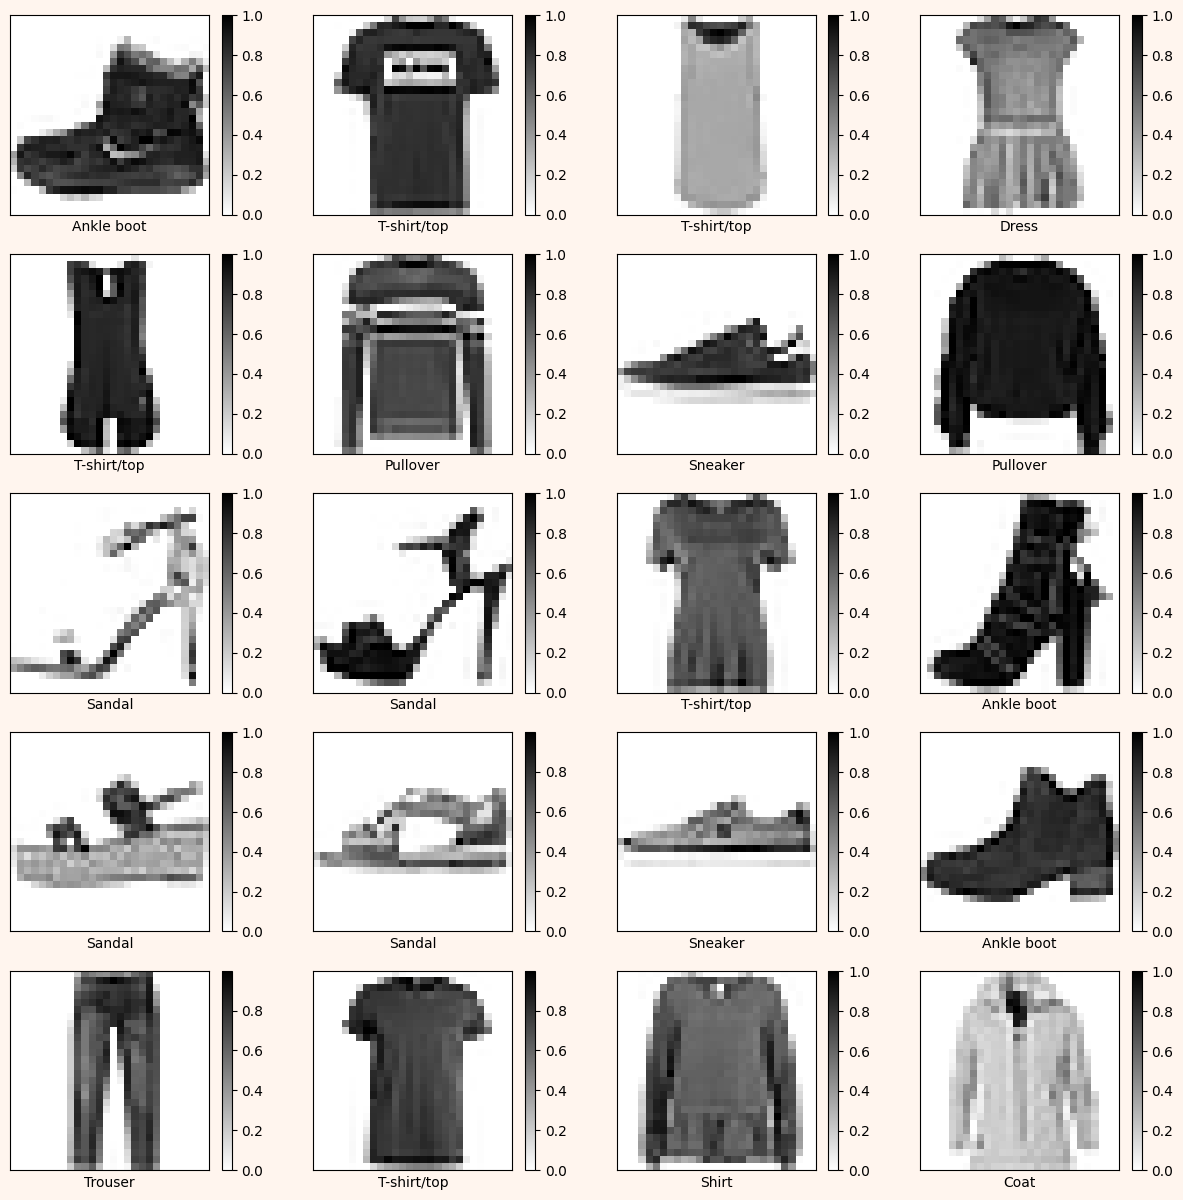

In [9]:
plt.figure(figsize=(15, 15), facecolor='SeaShell')
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(label_name[label_train[i]])

In [10]:
# Create neural network model

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.1),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')   
])

In [25]:
# Compile model NN

In [26]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [28]:
# Learning model NN

In [29]:
batch_size = 2048
epochs = 40

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8)

history=model.fit(
    x_train,
    label_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=epochs,
    callbacks = early_stop
)

Epoch 1/40
27/27 [==============================] - 1s 19ms/step - loss: 1.9200 - accuracy: 0.3452 - val_loss: 1.2172 - val_accuracy: 0.6307
Epoch 2/40
27/27 [==============================] - 0s 7ms/step - loss: 1.0173 - accuracy: 0.6410 - val_loss: 0.7879 - val_accuracy: 0.7232
Epoch 3/40
27/27 [==============================] - 0s 7ms/step - loss: 0.7308 - accuracy: 0.7359 - val_loss: 0.6148 - val_accuracy: 0.7742
Epoch 4/40
27/27 [==============================] - 0s 7ms/step - loss: 0.5934 - accuracy: 0.7908 - val_loss: 0.5161 - val_accuracy: 0.8233
Epoch 5/40
27/27 [==============================] - 0s 7ms/step - loss: 0.5137 - accuracy: 0.8246 - val_loss: 0.4634 - val_accuracy: 0.8373
Epoch 6/40
27/27 [==============================] - 0s 7ms/step - loss: 0.4653 - accuracy: 0.8417 - val_loss: 0.4251 - val_accuracy: 0.8517
Epoch 7/40
27/27 [==============================] - 0s 7ms/step - loss: 0.4298 - accuracy: 0.8529 - val_loss: 0.4052 - val_accuracy: 0.8590
Epoch 8/40
27/27 [=

In [17]:
# Model results

In [30]:
results = model.evaluate(x_test, label_test)
print(f'Model Loss: {round(results[0], 3)} \nModel Accuracy: {round(results[1], 3)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8883
Model Loss: 0.33 
Model Accuracy: 0.888


In [19]:
# Plot train and validation data

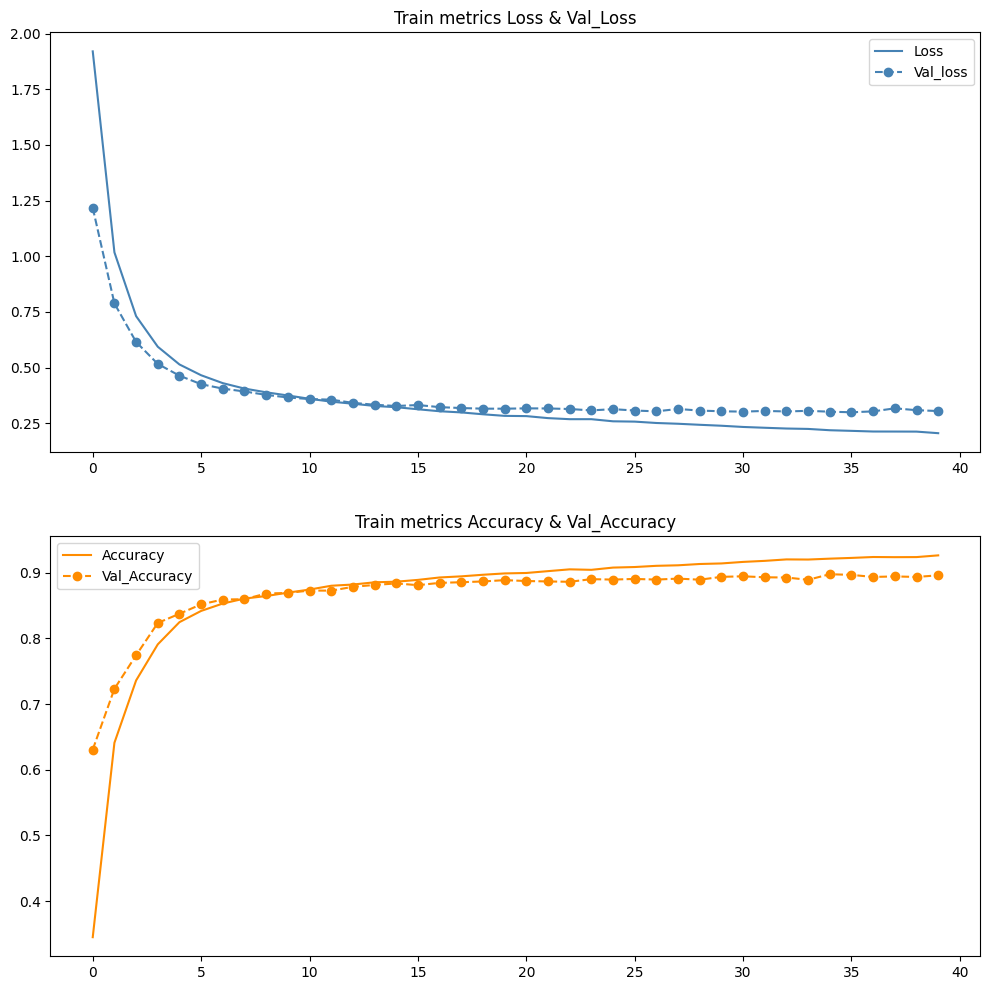

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))


axes[0].set_title('Train metrics Loss & Val_Loss')
axes[0].plot(history.history['loss'], label='Loss', color='SteelBlue')
axes[0].plot(history.history['val_loss'], label='Val_loss', marker='o', linestyle='--', color='SteelBlue')
axes[0].legend()

axes[1].set_title('Train metrics Accuracy & Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy', color='DarkOrange')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy', marker='o', linestyle='--', color='DarkOrange')
axes[1].legend()

plt.show()

In [21]:
# Predict model NN

In [32]:
predict=model.predict(x_test)

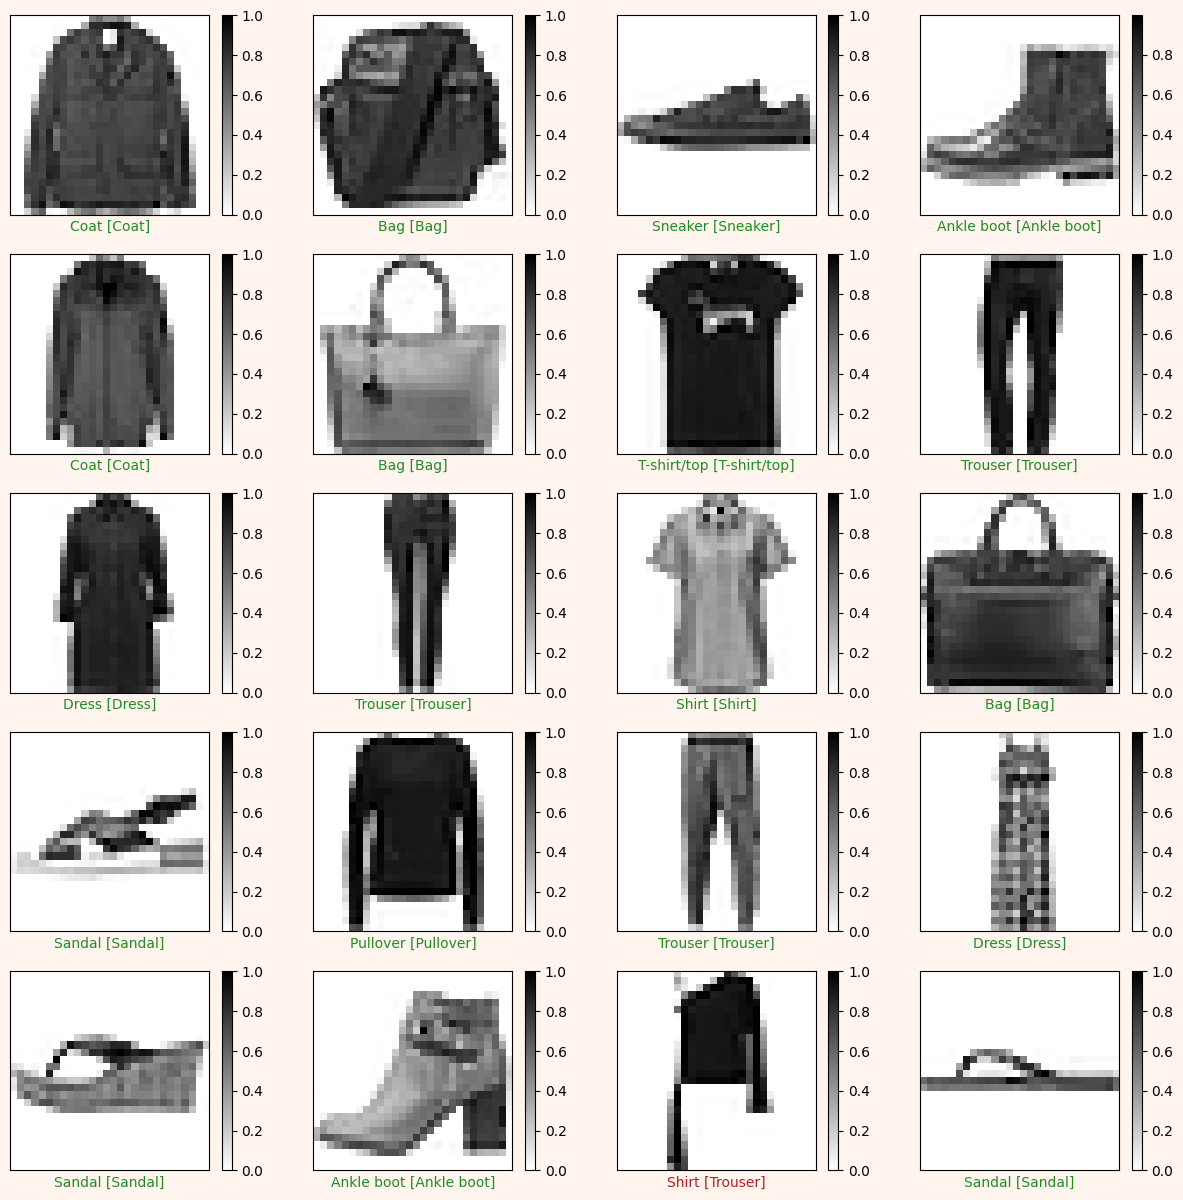

In [33]:
random_indexes = np.random.choice(len(x_test), size=20, replace=False)

plt.figure(figsize=(15, 15), facecolor='SeaShell')

for i in range(len(random_indexes)):
    
    index = random_indexes[i]
    
    pred_label = label_name[np.argmax(predict[index])]
    true_label = label_name[label_test[index]]
    
    if pred_label == true_label:
        color = "ForestGreen"
    else:
        color = "FireBrick"
    
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
    plt.xlabel("{} [{}]".format(true_label, pred_label), color=color)